_Workshop 5, Advanced AI - Statistics Module_

**Name: Jaime Lopez Hernandez**

_Date: 24/08/2023_


# 4. Interpreting coefficients with an example

In [11]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf


tickers=['ALFAA.MX','^MXX']

# Getting price data and selecting adjusted price columns:
sprices=yf.download(tickers=tickers, start="2018-01-01",end ="2022-07-31",interval="1mo")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAA','MXX']


[*********************100%%**********************]  2 of 2 completed


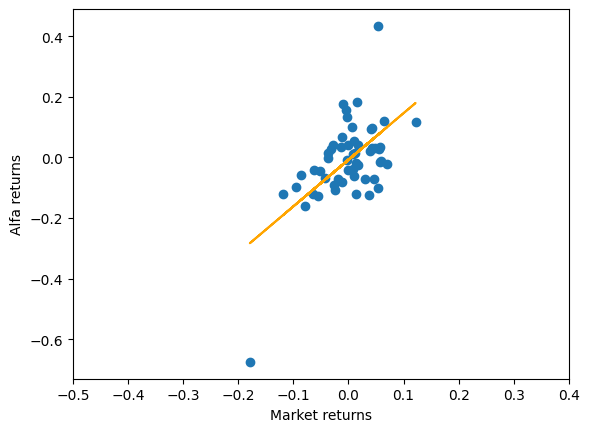

In [12]:
# Scatter plots can be misleading when ranges of X and Y are very different.
# In this case, Alfa had a very bad month in the COVID crisis with more than 60% loss!!
# Then, we can re-do the scatter plot trying to make the X and Y axis using the same range of values
plt.clf()
x=sr['MXX']
y = sr['ALFAA']
plt.scatter(x, y)
# Now I add the regression line:
b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

plt.plot(x, yfit,c="orange")

plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

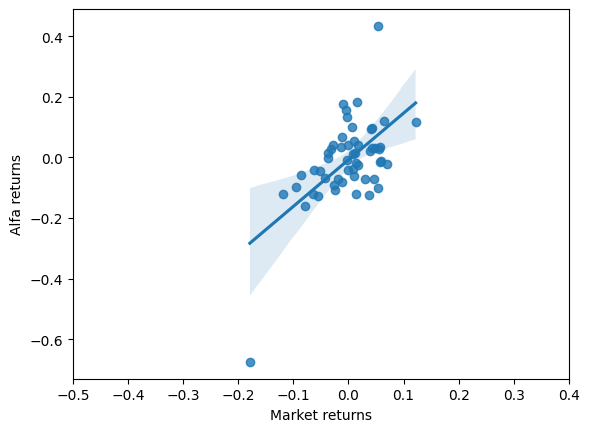

In [23]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:
import seaborn as sns
plt.clf()

X = sr['MXX'].values
Y = sr['ALFAA'].values

sns.regplot(x = X, y = Y)
plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

WHAT DOES THE PLOT TELL YOU? BRIEFLY EXPLAIN



THERE'S CLEARLY A POSITIVE RELATION BETWEEN THE ALFA RETURNS AND THE MARKET RETURNS. WHICH BASICALLY MEANS IF ALFA GOES UP THEN THE MARKET RETURNS OF THE IPC ALSO GOES UP. ANOTHER THING TO NOTE ABOUT THIS GRAPH IN PARTICULAR IS THAT THERE ARE SOME OUTLIER VALUES AROUND THE (-0.18,-0.5) AND (0.05 ,0.5) WHICH COULD POINT THAT THERE IS NOT DETERMINISTIC.

ANOTHER THING TO NOTICE IS THAT THE SLOPE IS PRETTY STEEP (IN THE SENSE THAT IT SEEMS TO BE HIGHER THAN 45 DEGREES). THIS COULD INDICATE THAT THE STOCK IS VERY SENSITIVE AND DUE TO THE FACT THAT IS STEEPER THATN 45 DEGREES, THEN FOR EACH PERCENT CHANGE THERE IS MORE THAN +1 PERCENT CHANGE IN THE STOCK RETURN. LIKEWISE, WHEN THE MARKET RETURNS CHANGES -1 THEN THE STOCK RETURN PERFORMS WORSE THAN -1%.

# 4.2 Running the regression with the OLS method


In [14]:
import statsmodels.api as sm
X = sm.add_constant(x)

mkmodel = sm.OLS(y,X).fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.36e-06
Time:                        15:13:51   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0080      0.015     -0.522      0.6

In [15]:
# Another way to run the same model using the ols function (instead of the OLS function):
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAA ~ MXX',data=sr).fit()

print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.36e-06
Time:                        15:13:54   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0080      0.015     -0.522      0.6

In [16]:
# Using matrix algebra to estimate the beta coefficients:
sr['constant'] = 1
selcols = ['constant','MXX']
x = sr[selcols].values
y = sr['ALFAA'].values

xtx = np.matmul(x.transpose(),x)
xty = np.matmul(x.transpose(),y)
invtxt = np.linalg.inv(xtx)

betas = np.matmul(invtxt,xty)
betas

array([-0.00795217,  1.53870396])

# 4.5 95% CONFIDENCE INTERVAL OF THE BETA COEFFICIENTS


*HOW WE INTERPRET THE 95% CONFIDENCE INTERVAL FOR $b_{0} $?*

$b_{0}$ IS ABLE TO TAKE A NEGATIVE VALUES, ZERO, AND POSITIVE VALUES. DUE TO THAT FACT THEN WE CAN NOT SAY THAT IN THE 95% WILL TAKE A NEGATIVE VALUE. THE CONCLUSION IS THAT NOT SIGNIFICANTLY NEGATIVE AT THE 95% CI. 


*HOW WE INTERPRET THE 95% CONFIDENCE INTERVAL FOR $b_{1} $?*

$b_{1}$ CAN TAKE VALUES BETWEEN 0.96 ALL THE WAY TO 2.11 AT THE 95% CI. THIS MEANS THAT MORE THAN 90% $b_{1}$ IS GREATER THAN ONE. THIS MEANS THAT ALPHA IS RISKIER THAN THE MARKET IN MORE THAN 90% BUT LESS THAN THE 95%. 